In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-dataset/health_data.csv


**Importing packages**

In [4]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import dateutil.parser
import re
#set jupyter to display up to 50 columns, so we can see evrything
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)

sns.set_palette('hls')
#show figures in notebook
%matplotlib inline 

**Read the Dataset**

In [5]:
# add a dataset with a CSV file
filepath="/kaggle/input/health-dataset/health_data.csv"
mydata=pd.read_csv(filepath)

In [6]:
# Print the first five rows of the data
mydata.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


**Read Random samples of 5**

In [7]:
mydata.sample(n=5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
66908,7.0,0.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,1.0,0.0
48190,9.0,0.0,1.0,1.0,38.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,30.0,1.0,0.0,1.0,0.0,0.0
59725,10.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0
60801,7.0,0.0,1.0,1.0,33.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0
14247,10.0,0.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0


**Descriptive statistics of the dataset**

In [8]:
mydata.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.500000,0.563458,0.062171
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.500004,0.495960,0.241468
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


**Checking columns, Count and Datatype**

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

**Chech fo Unique Values**

In [10]:
mydata['Smoker'].unique()

array([0., 1.])

**Chech for Missing Values**

In [11]:
#checking for missing value
mydata.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

**Data Visualization using Plots**

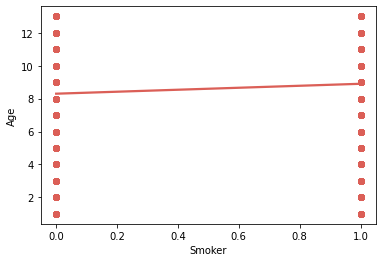

In [12]:
ax = sns.regplot(x = 'Smoker', y = 'Age', data = mydata)

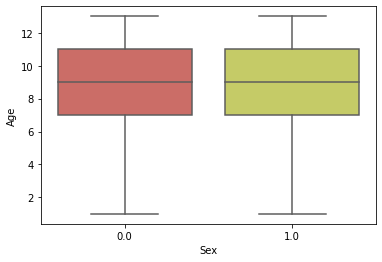

In [13]:
ax = sns.boxplot(x = 'Sex', y = 'Age', data = mydata)

**Histogam**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


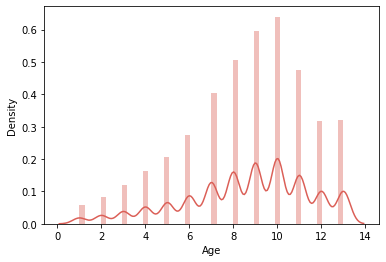

In [14]:
sns.distplot(mydata.Age);

In [15]:
numeric_var = mydata.select_dtypes(include=[np.number]).columns.to_list()
for var in numeric_var:
    print(var)

Age
Sex
HighChol
CholCheck
BMI
Smoker
HeartDiseaseorAttack
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
GenHlth
MentHlth
PhysHlth
DiffWalk
Diabetes
Hypertension
Stroke


In [23]:
cols = ['Age', 'Sex', 'BMI', 'Smoker','HighChol','Hypertension']
new_df = mydata[cols]
new_df

,Age,Sex,BMI,Smoker,HighChol,Hypertension
0,4.0,1.0,26.0,0.0,0.0,1.0
1,12.0,1.0,26.0,1.0,1.0,1.0
2,13.0,1.0,26.0,0.0,0.0,0.0
3,11.0,1.0,28.0,1.0,1.0,1.0
4,8.0,0.0,29.0,1.0,0.0,0.0
...,...,...,...,...,...,...
70687,6.0,0.0,37.0,0.0,1.0,0.0
70688,10.0,1.0,29.0,1.0,1.0,0.0
70689,13.0,0.0,25.0,0.0,1.0,1.0
70690,11.0,0.0,18.0,0.0,1.0,1.0


<AxesSubplot:xlabel='Hypertension'>

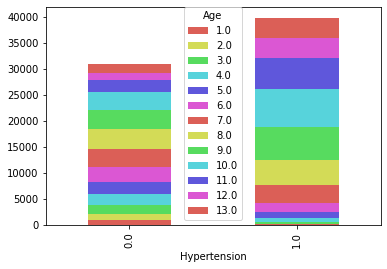

In [18]:
pd.crosstab(mydata['Hypertension'],mydata['Age']).plot.bar(stacked=True)

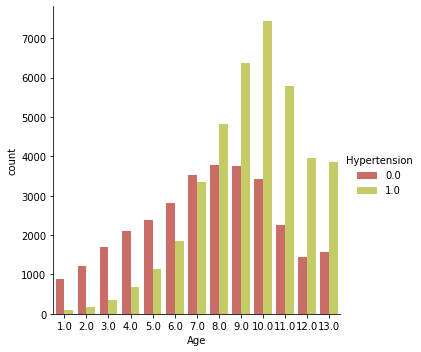

In [28]:
sns.catplot(x='Age',hue='Hypertension',data=mydata,kind="count")

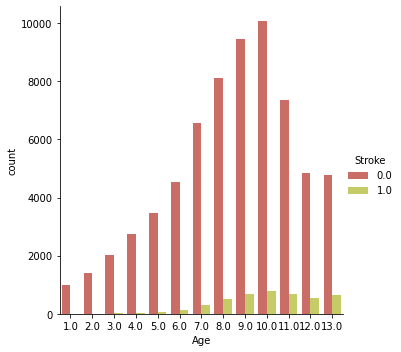

In [30]:
sns.catplot(x='Age',hue='Stroke',data=mydata,kind="count")

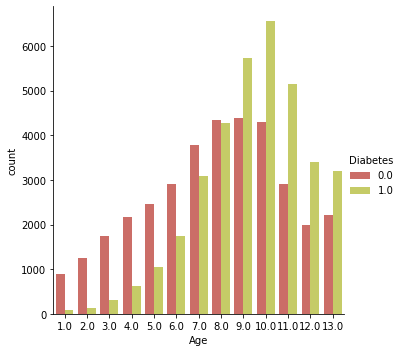

In [31]:
sns.catplot(x='Age',hue='Diabetes',data=mydata,kind="count")

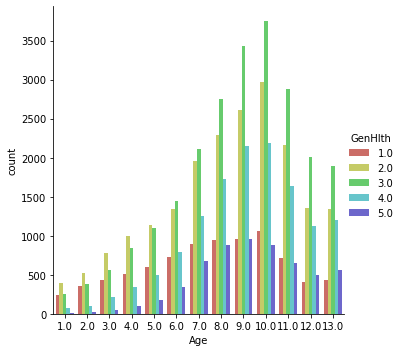

In [32]:
sns.catplot(x='Age',hue='GenHlth',data=mydata,kind="count")

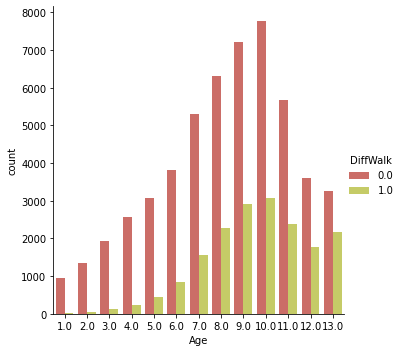

In [36]:
sns.catplot(x='Age',hue='DiffWalk',data=mydata,kind="count")

In [ ]:
sns.catplot(x='Age',hue='PhyHlth',data=mydata,kind="count")

<AxesSubplot:xlabel='Age'>

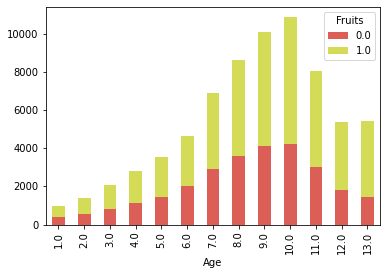

In [37]:
pd.crosstab(mydata['Age'],mydata['Fruits']).plot.bar(stacked=True)


<AxesSubplot:xlabel='Sex'>

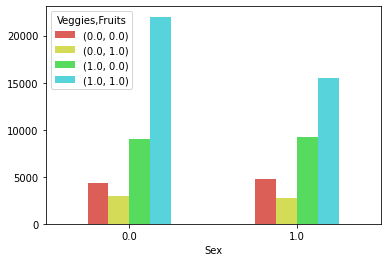

In [49]:
crosstb = pd.crosstab(mydata.Sex,[mydata.Veggies,mydata.Fruits] )
crosstb.plot(kind='bar', rot=0)